## Import libraries

In [7]:
import psycopg2
import pandas as pd

## Create a connection to the database

In [8]:
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=postgres user=postgres password=****")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)

## Use the connection to get a cursor that can be used to execute queries.

In [9]:
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)

## Set automatic commit to be true so that each action is committed without having to call conn.commit() after each command.

In [10]:
conn.set_session(autocommit=True)

## Create a database to do the work in

In [13]:
try: 
    cur.execute("create database projects")
except psycopg2.Error as e:
    print(e)

## Add the database name in the connect statement.

In [11]:
try: 
    conn.close()
except psycopg2.Error as e:
    print(e)
    
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=projects user=postgres password=****")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)

conn.set_session(autocommit=True)

## View Structure of Dataset


In [13]:
# Read the CSV file
cybersecurity_salaries = pd.read_csv("/tmp/salaries.csv")

# View the first 5 rows
cybersecurity_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Information Security Officer,160000,USD,160000,US,100,US,M
1,2023,EX,FT,Information Security Officer,100000,USD,100000,US,100,US,M
2,2023,SE,FT,Security Engineer,247250,USD,247250,US,0,US,M
3,2023,SE,FT,Security Engineer,160000,USD,160000,US,0,US,M
4,2023,SE,FT,Security Engineer,224250,USD,224250,US,0,US,M


In [ ]:
#get column names
cybersecurity_salaries.columns

create table diagram
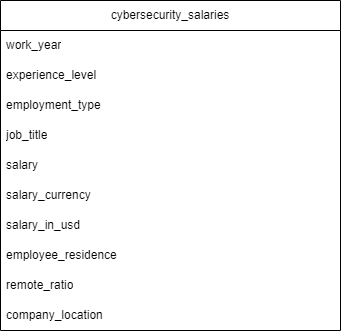

In [14]:
#test cleaning (not used)
cybersecurity_salaries_clean = cybersecurity_salaries[['job_title', 'experience_level', 'salary', 'company_location']]

cybersecurity_salaries_clean.head()

,job_title,experience_level,salary,company_location
0,Information Security Officer,EX,160000,US
1,Information Security Officer,EX,100000,US
2,Security Engineer,SE,247250,US
3,Security Engineer,SE,160000,US
4,Security Engineer,SE,224250,US


## Create Table


In [15]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS cybersecurity_salaries (work_year int, experience_level varchar,\
    employment_type varchar, job_title varchar, salary int, salary_currency varchar, salary_in_usd int,\
    employee_residence varchar, remote_ratio int, company_location varchar, company_size varchar);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    

### Insert the data into the table

In [16]:
try: 
    cur.execute('''COPY cybersecurity_salaries(work_year, experience_level,\
    employment_type, job_title, salary, salary_currency, salary_in_usd,\
    employee_residence, remote_ratio, company_location, company_size) 
    FROM '/tmp/salaries.csv' 
    DELIMITER ',' 
    CSV HEADER;''')
  

except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    

## insert using for loop (not used just for practice)

In [ ]:
cybersecurity_salaries_insert = ("""INSERT INTO cybersecurity_salaries(
work_year, 
experience_level,
employment_type, 
job_title, 
salary, 
salary_currency, 
salary_in_usd,
employee_residence, 
remote_ratio, 
company_location, 
company_size)
VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,)
""")


for i, row in cybersecurity_salaries.iterrows():
        cur.execute(cybersecurity_salaries_insert, list(row))

## Validate data was inserted into the table

In [17]:
try: 
    cur.execute("SELECT * FROM cybersecurity_salaries limit 10;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(2023, 'EX', 'FT', 'Information Security Officer', 160000, 'USD', 160000, 'US', 100, 'US', 'M')
(2023, 'EX', 'FT', 'Information Security Officer', 100000, 'USD', 100000, 'US', 100, 'US', 'M')
(2023, 'SE', 'FT', 'Security Engineer', 247250, 'USD', 247250, 'US', 0, 'US', 'M')
(2023, 'SE', 'FT', 'Security Engineer', 160000, 'USD', 160000, 'US', 0, 'US', 'M')
(2023, 'SE', 'FT', 'Security Engineer', 224250, 'USD', 224250, 'US', 0, 'US', 'M')
(2023, 'SE', 'FT', 'Security Engineer', 116000, 'USD', 116000, 'US', 0, 'US', 'M')
(2023, 'SE', 'FT', 'Security Architect', 146000, 'USD', 146000, 'US', 100, 'US', 'M')
(2023, 'SE', 'FT', 'Security Architect', 78900, 'USD', 78900, 'US', 100, 'US', 'M')
(2023, 'SE', 'FT', 'Security Engineer', 384348, 'USD', 384348, 'US', 0, 'US', 'M')
(2023, 'SE', 'FT', 'Security Engineer', 255652, 'USD', 255652, 'US', 0, 'US', 'M')



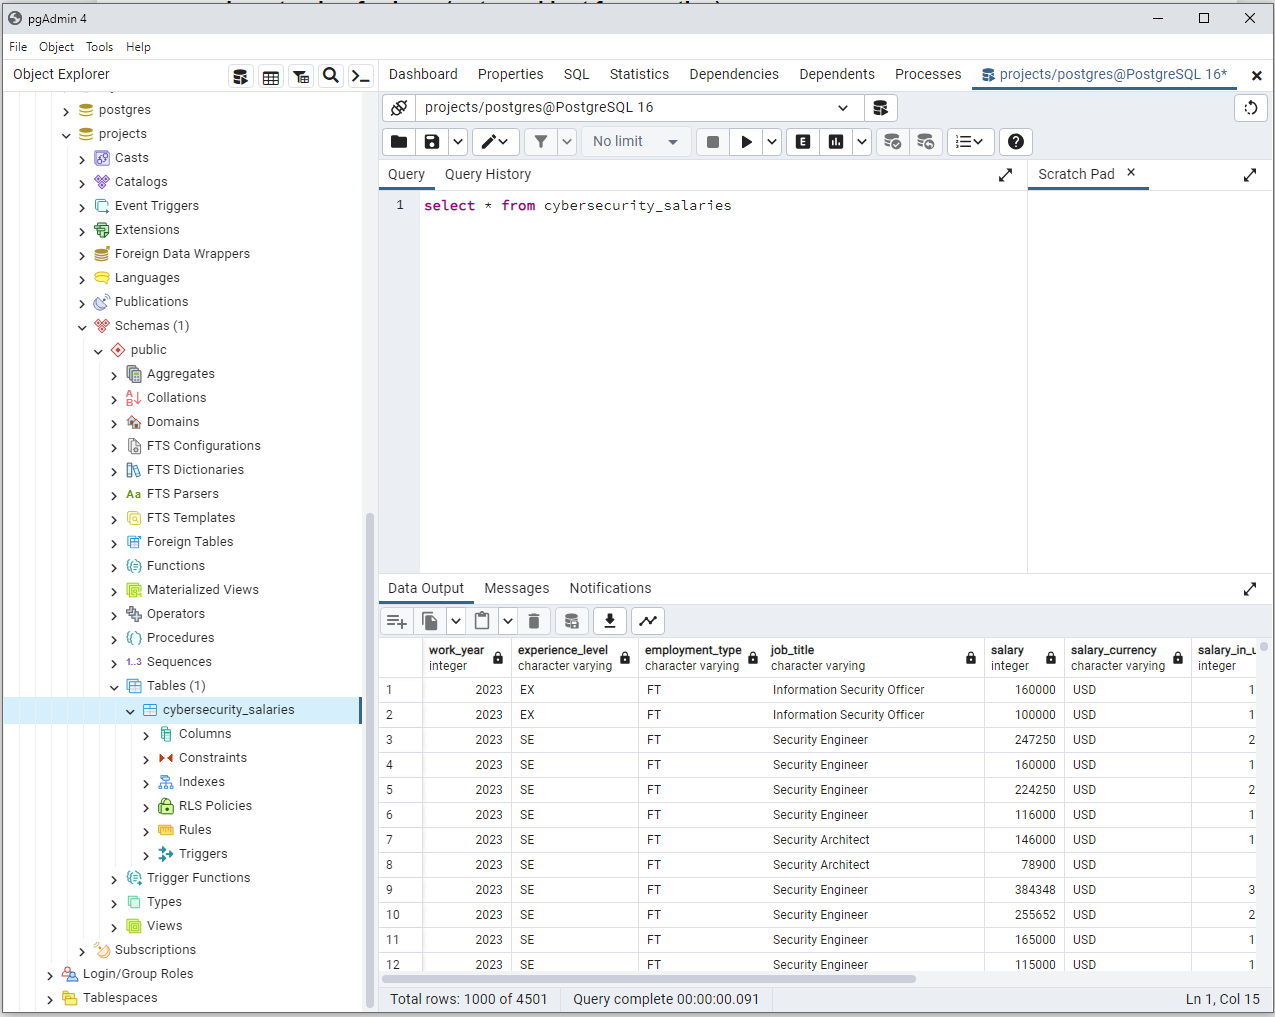

##  close cursor and connection

In [18]:
cur.close()
conn.close()